In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


<Axes: >

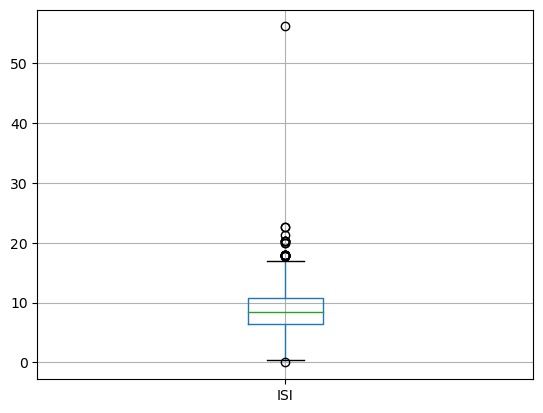

In [4]:
df[['ISI']].boxplot()

<Axes: xlabel='month', ylabel='area'>

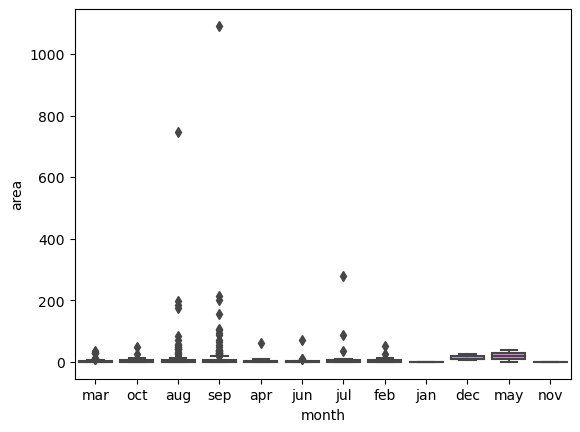

In [4]:
sns.boxplot(data=df,x='month',y='area')

<Axes: xlabel='temp', ylabel='area'>

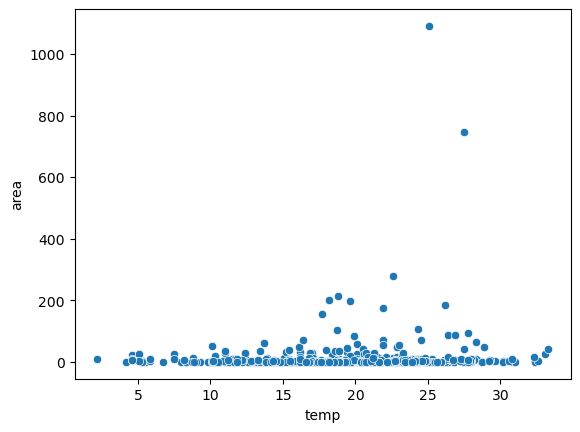

In [6]:
sns.scatterplot(data=df,x='temp',y='area')

<Axes: xlabel='wind', ylabel='area'>

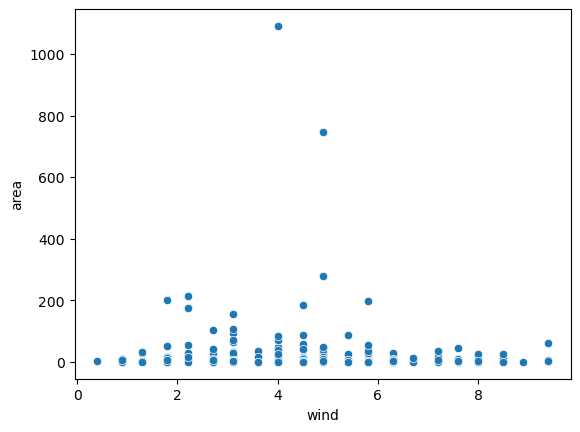

In [7]:
sns.scatterplot(data=df,x='wind',y='area')

<Axes: xlabel='rain', ylabel='area'>

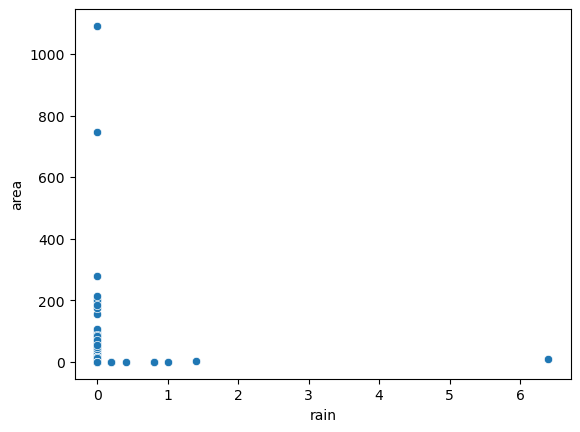

In [8]:
sns.scatterplot(data=df,x='rain',y='area')

In [11]:
df.corr().tail(1).T

C:\Users\Amol Khapare\AppData\Local\Temp\ipykernel_896\3126229702.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().tail(1).T


,area
X,0.063385
Y,0.044873
FFMC,0.040122
DMC,0.072994
DC,0.049383
ISI,0.008258
temp,0.097844
RH,-0.075519
wind,0.012317
rain,-0.007366


C:\Users\Amol Khapare\AppData\Local\Temp\ipykernel_896\264793538.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['area']],annot=True)


<Axes: >

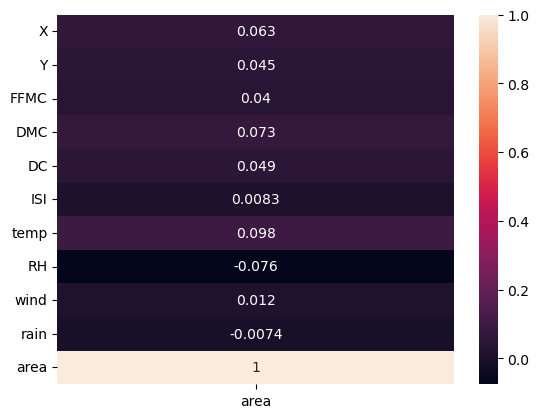

In [12]:
sns.heatmap(df.corr()[['area']],annot=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [14]:
df['month']

0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: object

In [15]:
df['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [16]:
df['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},inplace=True)

In [46]:
month_data={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(4), object(1)
memory usage: 52.6+ KB


In [18]:
df=df.drop('day',axis=1)

<Figure size 10000x10000 with 0 Axes>

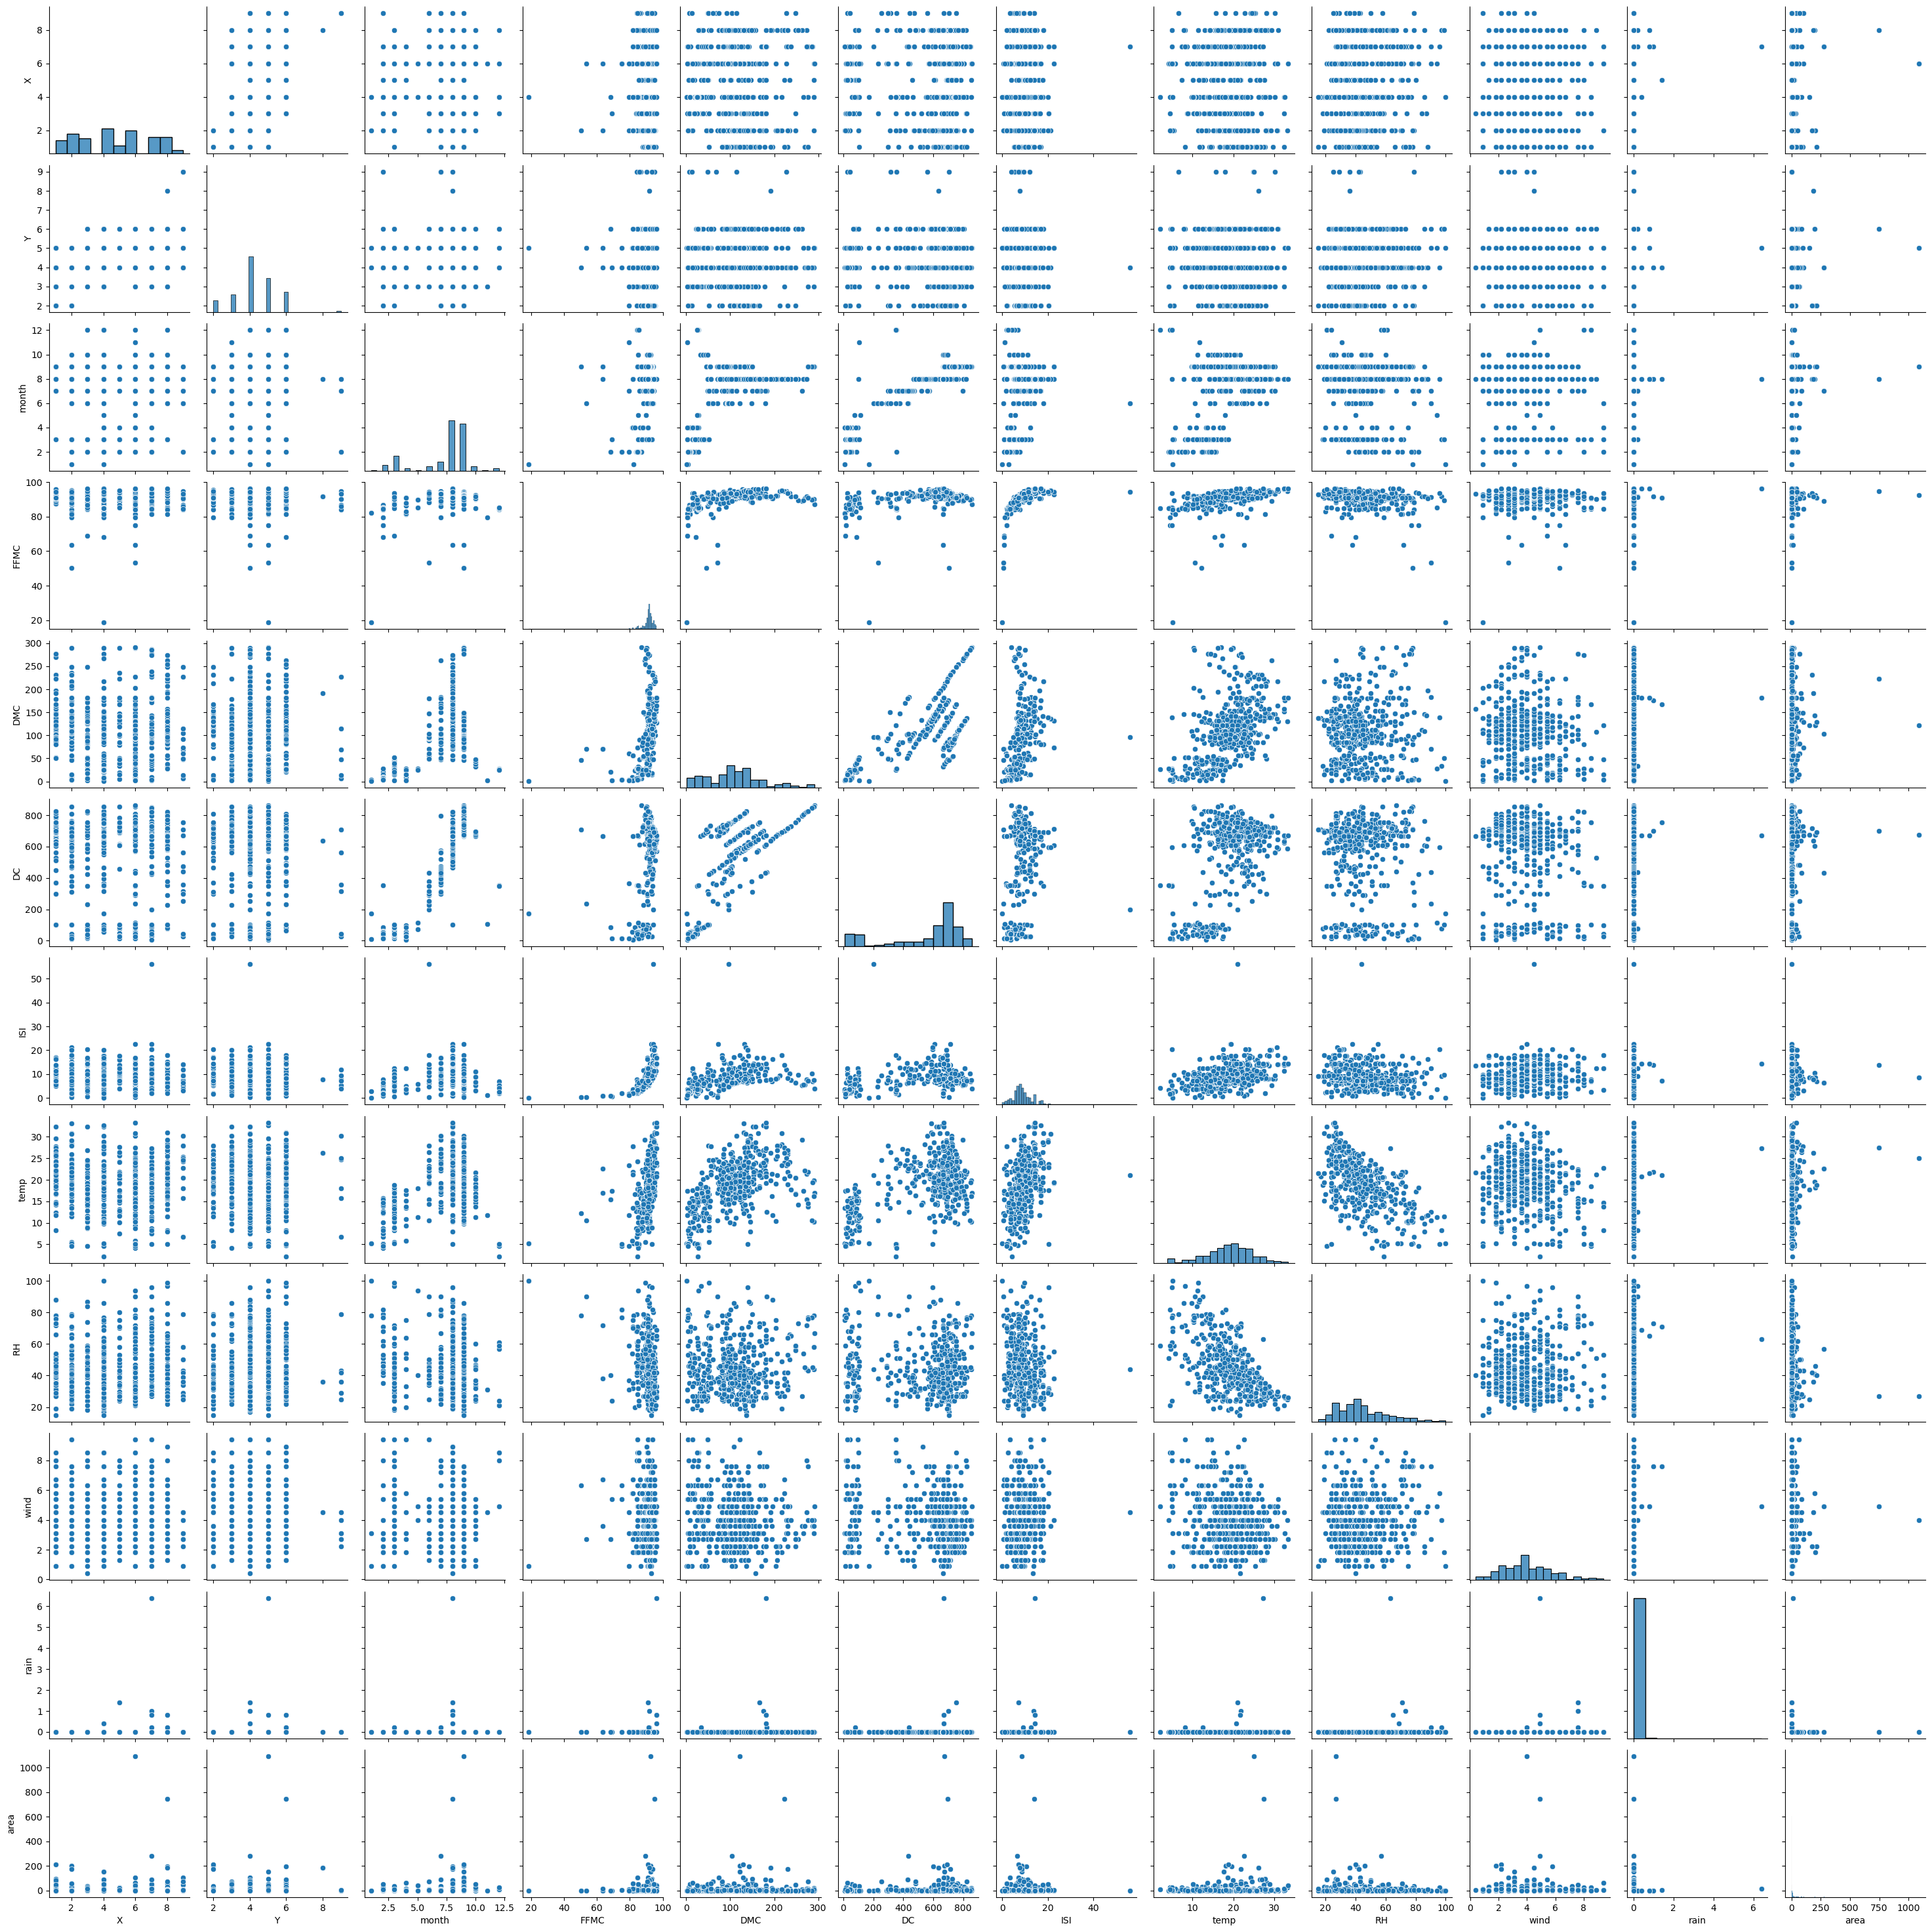

In [20]:
plt.figure(figsize=(100,100))
sns.pairplot(df)
plt.show()

## Model Train

In [22]:
x=df.drop('area',axis=1)
y=df['area']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=5)

In [24]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

In [28]:
y_pred = linreg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print('MSE : ',mse)
rmse = np.sqrt(mse)

print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared :",r2_value)

MSE :  11303.447906308595
RMSE : 106.31767447752323
MAE : 22.691012563107147
R-Squared : 0.013340753654817239


In [27]:
y_pred_train=linreg.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print('MSE : ',mse)
rmse = np.sqrt(mse)

print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared :",r2_value)

MSE :  2106.73456481489
RMSE : 45.899178258601644
MAE : 17.08408784066714
R-Squared : 0.030306249345194103


In [29]:
x.head(1).T

,0
X,7.0
Y,5.0
month,3.0
FFMC,86.2
DMC,26.2
DC,94.3
ISI,5.1
temp,8.2
RH,51.0
wind,6.7


In [47]:
X = 7.0
Y = 5.0
month = 'mar'
FFMC = 86.2
DMC = 26.2
DC = 94.3
ISI = 5.1
temp = 8.2
RH = 51.0
wind = 6.7
rain = 0.0

month=month_data[month]

In [59]:
array = np.zeros([1,linreg.n_features_in_])
array[0][0] = X
array[0][1] = Y
array[0][2] = month
array[0][3] = FFMC
array[0][4] = DMC
array[0][5] = DC
array[0][6] = ISI
array[0][7] = temp
array[0][8] = RH
array[0][9] = wind
array[0][10] = rain

print(array)

[[ 7.   5.   3.  86.2 26.2 94.3  5.1  8.2 51.   6.7  0. ]]


In [62]:
predicted_area = np.around(linreg.predict(array)[0],3)
predicted_area

C:\Users\Amol Khapare\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


7.34

In [65]:
import json

In [66]:
project_data={'month':month_data,"columns":list(x.columns)}
with open('proj_data.json','w') as f:
    json.dump(project_data, f)

In [67]:
import pickle

In [69]:
with open('forest.pkl','wb') as f:
    pickle.dump(linreg, f)